Santé Publique France
-----------------

OVERVIEW:

In this tutorial notebook, we will be coving a health care data of foods containing sugar, protien, fat etc. 
Steps are:
- We will load our data from the data given by the french open food facts.

- We will first apply some EDA.

- We will also do some data cleaning as there are impossible values

- We will also calculate how much sugar content the fruit drinks in France contain. 

- Finally we will reduce to data to a small data and create widgets. This will help in grading the food in terms of nutigrade (fat, carbohydrate, protein content.)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as sst
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

**J'importe des données**

In [2]:
data = pd.read_csv('fr.openfoodfacts.org.products.csv',sep ='\t', lineterminator ='\n', error_bad_lines=False)

/Users/sanjibansantra/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,19,20,24,25,26,28,35,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
data.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,3.207490e+05,0.0,0.0,0.0,248961.000000,248961.000000,0.0,248961.000000,0.0,...,49.000000,3046.000000,165.000000,948.000000,0.0,268.000000,221233.000000,221233.000000,0.0,0.0
mean,1.470622e+09,1.478938e+09,NaN,NaN,NaN,1.936384,0.019658,NaN,0.055246,NaN,...,6.425698,31.376615,15.412121,49.547785,NaN,341.700764,9.164736,9.057261,NaN,NaN
std,3.307000e+07,2.084030e+07,NaN,NaN,NaN,2.502319,0.140518,NaN,0.269203,NaN,...,2.047841,31.947699,3.753028,18.757932,NaN,425.211439,9.055796,9.183461,NaN,NaN
min,0.000000e+00,1.332368e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,1.462984e+09,1.479389e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,1.489058e+09,1.489062e+09,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,...,7.200000,22.100000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,1.489079e+09,1.489093e+09,NaN,NaN,NaN,3.000000,0.000000,NaN,0.000000,NaN,...,7.400000,50.950000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,1.492737e+09,1.492737e+09,NaN,NaN,NaN,31.000000,2.000000,NaN,6.000000,NaN,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


In [5]:
data.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity',
       ...
       'ph_100g', 'fruits-vegetables-nuts_100g',
       'collagen-meat-protein-ratio_100g', 'cocoa_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g',
       'water-hardness_100g'],
      dtype='object', length=162)

In [6]:
data.describe()

,created_t,last_modified_t,cities,allergens_fr,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,3.207490e+05,3.207490e+05,0.0,0.0,0.0,248961.000000,248961.000000,0.0,248961.000000,0.0,...,49.000000,3046.000000,165.000000,948.000000,0.0,268.000000,221233.000000,221233.000000,0.0,0.0
mean,1.470622e+09,1.478938e+09,NaN,NaN,NaN,1.936384,0.019658,NaN,0.055246,NaN,...,6.425698,31.376615,15.412121,49.547785,NaN,341.700764,9.164736,9.057261,NaN,NaN
std,3.307000e+07,2.084030e+07,NaN,NaN,NaN,2.502319,0.140518,NaN,0.269203,NaN,...,2.047841,31.947699,3.753028,18.757932,NaN,425.211439,9.055796,9.183461,NaN,NaN
min,0.000000e+00,1.332368e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,0.000000,0.000000,8.000000,6.000000,NaN,0.000000,-15.000000,-15.000000,NaN,NaN
25%,1.462984e+09,1.479389e+09,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,...,6.300000,0.000000,12.000000,32.000000,NaN,98.750000,1.000000,1.000000,NaN,NaN
50%,1.489058e+09,1.489062e+09,NaN,NaN,NaN,1.000000,0.000000,NaN,0.000000,NaN,...,7.200000,22.100000,15.000000,50.000000,NaN,195.750000,10.000000,9.000000,NaN,NaN
75%,1.489079e+09,1.489093e+09,NaN,NaN,NaN,3.000000,0.000000,NaN,0.000000,NaN,...,7.400000,50.950000,15.000000,64.250000,NaN,383.200000,16.000000,16.000000,NaN,NaN
max,1.492737e+09,1.492737e+09,NaN,NaN,NaN,31.000000,2.000000,NaN,6.000000,NaN,...,8.400000,100.000000,25.000000,100.000000,NaN,2842.000000,40.000000,40.000000,NaN,NaN


## Nettoyage des données

In [7]:
data.isnull().mean().sort_values(ascending=False)

water-hardness_100g       1.0
behenic-acid_100g         1.0
mead-acid_100g            1.0
gondoic-acid_100g         1.0
elaidic-acid_100g         1.0
                         ... 
last_modified_datetime    0.0
last_modified_t           0.0
created_t                 0.0
url                       0.0
code                      0.0
Length: 162, dtype: float64

In [8]:
data.isnull().mean(axis=1).sort_values(ascending=False)

255815    0.938272
175246    0.938272
199373    0.938272
218508    0.938272
226833    0.938272
            ...   
190643    0.456790
190641    0.450617
253902    0.444444
197571    0.444444
190774    0.432099
Length: 320749, dtype: float64

Je supprimer la colonne dont les valeurs nulles sont supérieures à 80%

In [9]:
data = data[data.columns[data.isnull().mean() <= 0.8]]

In [10]:
data = data.drop(columns=['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'quantity',
       'packaging', 'packaging_tags', 'brands', 'brands_tags', 'image_url', 'image_small_url', 'countries_fr', 'countries_tags'])
data

,product_name,categories,categories_tags,categories_fr,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,Peanuts,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,Organic Salted Nut Mix,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,Organic Polenta,NaN,NaN,NaN,US,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320744,Tomato & ricotta,NaN,NaN,NaN,en:RO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,US,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,[ organic-peppermint -> en:organic-peppermint...,NaN,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320746,乐吧泡菜味薯片,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",China,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,Tomates aux Vermicelles,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.duplicated().sum()

19623

Nous supprimons toutes les données qui sont des doublons

In [12]:
data.drop_duplicates(inplace=True)

In [13]:
data

,product_name,categories,categories_tags,categories_fr,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,Farine de blé noir,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),NaN,NaN,NaN,US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,...,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0,14.0
2,Peanuts,NaN,NaN,NaN,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,...,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0,0.0
3,Organic Salted Nut Mix,NaN,NaN,NaN,US,"Organic hazelnuts, organic cashews, organic wa...",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ...,NaN,...,7.1,17.86,1.22428,0.482,NaN,NaN,0.143,0.00514,12.0,12.0
4,Organic Polenta,NaN,NaN,NaN,US,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [...,NaN,...,5.7,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320744,Tomato & ricotta,NaN,NaN,NaN,en:RO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320745,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,NaN,US,"Organic peppermint, organic lemon grass, organ...",20 g (0.7 oz),0.0,[ organic-peppermint -> en:organic-peppermint...,NaN,...,0.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,0.0,0.0
320746,乐吧泡菜味薯片,Potato chips,"en:salty-snacks,en:appetizers,en:chips-and-fri...","Snacks salés,Apéritif,Chips et frites,Chips,Ch...",China,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320747,Tomates aux Vermicelles,NaN,NaN,NaN,en:FR,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data.columns[0:37]

Index(['product_name', 'categories', 'categories_tags', 'categories_fr',
       'countries', 'ingredients_text', 'serving_size', 'additives_n',
       'additives', 'additives_tags', 'additives_fr',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [15]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,242670.000000,242670.000000,242670.000000,2.548910e+05,237697.000000,224559.000000,138458.000000,139325.000000,237396.000000,239732.000000,196576.000000,253687.000000,249301.000000,249254.000000,133331.000000,136643.000000,136889.000000,136234.000000,216876.000000,216876.000000
mean,1.954428,0.020143,0.056047,1.142082e+03,12.617247,5.131065,0.075060,0.020235,32.232892,16.004795,2.852017,7.116179,2.022193,0.796287,0.000404,0.023900,0.126247,0.003708,9.212315,9.102796
std,2.513829,0.142208,0.271417,6.523266e+03,17.149439,8.008004,1.564621,0.364068,29.694937,22.293824,12.977166,8.409810,129.844834,51.124830,0.074430,2.270747,3.368092,0.217708,9.044051,9.174809
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,-6.700000,-800.000000,0.000000,0.000000,-0.000340,-0.002100,0.000000,-0.000260,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,3.850000e+02,0.000000,0.000000,0.000000,0.000000,6.130000,1.300000,0.000000,0.710000,0.063500,0.025000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1.100000e+03,5.100000,1.800000,0.000000,0.000000,21.180000,5.800000,1.500000,4.800000,0.590000,0.232283,0.000000,0.000000,0.036000,0.001030,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1.674000e+03,20.000000,7.140000,0.000000,0.021000,58.500000,24.000000,3.600000,10.000000,1.384300,0.545000,0.000107,0.003700,0.107000,0.002400,16.000000,16.000000
max,31.000000,2.000000,6.000000,3.251373e+06,714.290000,550.000000,369.000000,95.238000,2916.670000,3520.000000,5380.000000,430.000000,64312.800000,25320.000000,26.700000,716.981100,694.737000,50.000000,40.000000,40.000000


Text(0.5, 1.0, 'Distribution Plot for carbohydrates_100g')

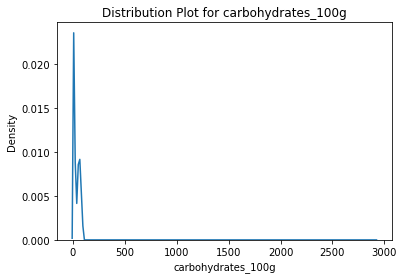

In [16]:
sns.kdeplot(data['carbohydrates_100g']).set_title('Distribution Plot for carbohydrates_100g')

Nous devons nettoyer davantage les données car il y a des valeurs impossibles.

In [17]:
F = ["fat_100g", "saturated-fat_100g", "trans-fat_100g", "carbohydrates_100g","sugars_100g", "fiber_100g", "proteins_100g","salt_100g", "vitamin-a_100g","vitamin-c_100g","calcium_100g","sodium_100g"]
for x in F:
    data = data[data[x]<= 100]

In [18]:
data = data[data['energy_100g']<=3700]

 Nous créons une nouvelle colonne "nutrition_score_100g" en éliminant toutes les valeurs "nutrition_score_uk_100g$\neq$ nutrition_score_fr_100g." 

In [19]:
data['nutrition-score_100g'] = data['nutrition-score-uk_100g'][data['nutrition-score-uk_100g'] == data['nutrition-score-fr_100g']]

In [20]:
data = data.drop(columns=['nutrition-score-uk_100g', 'nutrition-score-fr_100g', 'categories', 'categories_tags', 'categories_fr'])

In [21]:
data.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
count,122267.000000,122267.000000,122267.000000,122554.000000,122554.000000,122554.000000,122554.000000,122345.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122554.000000,122428.000000,122469.000000
mean,2.058724,0.000164,0.023776,1216.253453,13.345819,4.707410,0.063238,0.018028,35.806477,15.512636,2.842967,7.973726,1.285490,0.506098,0.000131,0.006133,0.092234,0.002433,9.472805
std,2.573653,0.012789,0.154377,735.121566,15.151293,6.699842,0.932160,0.274410,28.135378,19.561110,4.340711,8.163043,3.613765,1.422726,0.000542,0.108043,0.256176,0.151847,9.010774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.570000,0.000000,0.000000,-17.860000,0.000000,-3.570000,0.000000,0.000000,0.000000,-0.002100,0.000000,-0.000260,-10.000000
25%,0.000000,0.000000,0.000000,506.000000,0.880000,0.000000,0.000000,0.000000,9.410000,1.670000,0.000000,2.380000,0.149860,0.059000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,1280.000000,7.970000,1.790000,0.000000,0.000000,28.890000,6.060000,1.500000,5.710000,0.756920,0.298000,0.000000,0.000000,0.035000,0.000970,10.000000
75%,3.000000,0.000000,0.000000,1766.000000,21.430000,7.140000,0.000000,0.020000,60.710000,24.690000,3.600000,10.810000,1.450340,0.571000,0.000100,0.002100,0.100000,0.002400,17.000000
max,31.000000,1.000000,2.000000,3699.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,99.905820,39.333000,0.051818,35.714300,50.000000,50.000000,37.000000


In [22]:
data.head()

,product_name,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
1,Banana Chips Sweetened (Whole),US,"Bananas, vegetable oil (coconut oil, corn oil ...",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -...,NaN,NaN,0.0,0.0,...,14.29,3.6,3.57,0.00000,0.000,0.0,0.0214,0.000,0.00129,14.0
2,Peanuts,US,"Peanuts, wheat flour, sugar, rice flour, tapio...",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> ...,NaN,NaN,0.0,0.0,...,17.86,7.1,17.86,0.63500,0.250,0.0,0.0000,0.071,0.00129,0.0
77,Granola Cranberry And Acai,US,"Whole rolled oats, milled cane sugar, vegetabl...",55 g (0.5 cup),0.0,[ whole-rolled-oats -> en:whole-rolled-oats ...,NaN,NaN,0.0,0.0,...,25.45,5.5,9.09,0.25400,0.100,0.0,0.0000,0.036,0.00262,6.0
80,"Peanuts, Mixed Nuts",US,"Peanuts, honey, coating (sucrose, wheat starch...",28 g (0.25 cup),1.0,[ peanuts -> en:peanuts ] [ honey -> en:hon...,en:e415,E415 - Gomme xanthane,0.0,0.0,...,14.29,7.1,25.00,0.54356,0.214,0.0,0.0000,0.071,0.00514,14.0
146,Cranberries,US,"Cranberries, sugar, sunflower oil.",30 g (0.25 cup),0.0,[ cranberries -> en:cranberries ] [ sugar -...,NaN,NaN,0.0,0.0,...,66.67,10.0,0.00,0.00000,0.000,0.0,0.0000,0.000,0.00000,8.0


Text(0.5, 1.0, 'Distribution Plot salt_100g')

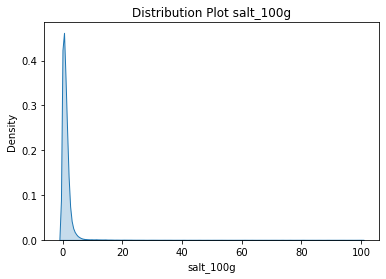

In [23]:
sns.kdeplot(data['salt_100g'], fill=True).set_title('Distribution Plot salt_100g')

In [24]:
data['nutrition_grade_fr'].unique()

array(['d', 'b', 'c', 'e', 'a', nan], dtype=object)

Text(0.5, 1.0, 'Box Plot for nutrition-score')

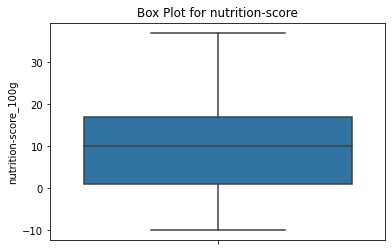

In [25]:
sns.boxplot(y='nutrition-score_100g', data=data).set_title('Box Plot for nutrition-score')

In [26]:
#data.select_dtypes(include=float).plot(kind='box', subplots=True, title='Data Shape', figsize=(15,15), layout=(6,4))

#plt.show()

Text(0.5, 1.0, 'Box Plot for energy_100g')

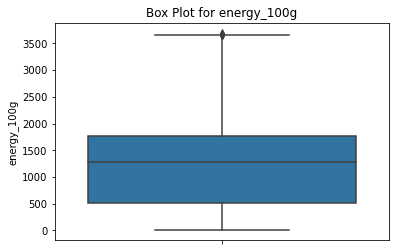

In [27]:
sns.boxplot(y='energy_100g', data=data).set_title('Box Plot for energy_100g')

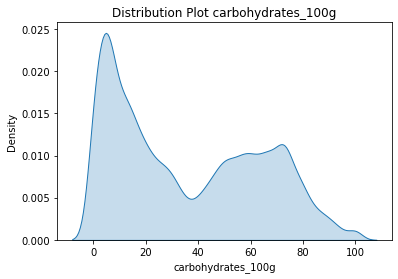

In [28]:
sns.kdeplot(data['carbohydrates_100g'], fill=True).set_title('Distribution Plot carbohydrates_100g')
plt.savefig("kde_a_file.png")

In [29]:
data.columns = ['nutritiongrade' if x=='nutrition_grade_fr' else x for x in data.columns]

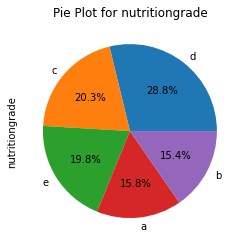

In [30]:
data['nutritiongrade'].value_counts().plot.pie(center=(0, 0), radius=1.0, autopct='%1.1f%%').set_title('Pie Plot for nutritiongrade')
plt.savefig("saving_as_a_file.png")

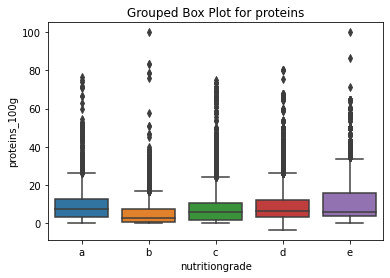

In [31]:
sns.boxplot(x='nutritiongrade', y='proteins_100g', order=['a', 'b', 'c', 'd', 'e'], data=data).set_title('Grouped Box Plot for proteins')
plt.savefig("boxplot.png")

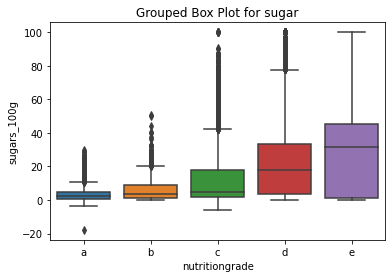

In [32]:
sns.boxplot(x='nutritiongrade', y='sugars_100g', order=['a', 'b', 'c', 'd', 'e'], data=data).set_title('Grouped Box Plot for sugar')
plt.savefig("boxplot1.png")

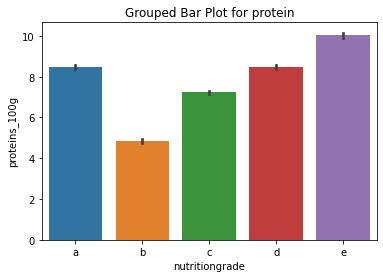

In [33]:
sns.barplot(x='nutritiongrade', y='proteins_100g', order=['a', 'b', 'c', 'd', 'e'], data=data).set_title('Grouped Bar Plot for protein')
plt.savefig("barplot1.png")

In [34]:
data.to_csv('food.csv', index=False)

In [35]:
data.shape

(122554, 34)

In [36]:
data['pnns_groups_1'].unique()

array([nan, 'Sugary snacks', 'unknown', 'Composite foods',
       'Milk and dairy products', 'Cereals and potatoes',
       'Fat and sauces', 'Fish Meat Eggs', 'Salty snacks',
       'Fruits and vegetables', 'Beverages', 'fruits-and-vegetables'],
      dtype=object)

In [37]:
data['pnns_groups_2'].unique()

array([nan, 'Biscuits and cakes', 'unknown', 'Pizza pies and quiche',
       'One-dish meals', 'Milk and yogurt', 'Cereals',
       'Dressings and sauces', 'Chocolate products', 'Sweets', 'Bread',
       'Meat', 'Nuts', 'Vegetables', 'Legumes', 'Appetizers',
       'Sweetened beverages', 'Fruit juices', 'Eggs',
       'Non-sugared beverages', 'Breakfast cereals', 'Fruits',
       'Fish and seafood', 'Cheese', 'Ice cream', 'Processed meat',
       'Fats', 'Dried fruits', 'vegetables', 'Soups', 'Dairy desserts',
       'Artificially sweetened beverages'], dtype=object)

In [38]:
frudrinks= data[data['pnns_groups_2']=='Fruit juices']
frudrinks

,product_name,countries,ingredients_text,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,...,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score_100g
10358,Strawberry Lemonade,United States,NaN,1 can (12 FL OZ) 355 mL,NaN,NaN,NaN,NaN,NaN,NaN,...,5.560,0.000,0.000,0.00353,0.001390,0.000000,0.00333,0.00000,0.000000,NaN
13134,coconut juice,"France,États-Unis",NaN,240 ml,NaN,NaN,NaN,NaN,NaN,NaN,...,6.250,0.000,0.000,0.09530,0.037500,0.000000,0.00000,0.02500,0.000225,NaN
13135,Roasted Coconut Juice,"France,États-Unis",NaN,350 ml (1 CAN),NaN,NaN,NaN,NaN,NaN,NaN,...,8.900,0.000,0.500,0.12000,0.047244,0.000000,0.00000,0.00600,0.000100,NaN
67301,Orange Juice,United States,ORGANIC ORANGE JUICE,8 fl oz (240 mL),0.0,[ organic-orange-juice -> en:organic-orange-j...,NaN,NaN,0.0,0.0,...,0.833,0.000,0.417,0.00000,0.000000,0.000000,0.03000,0.00833,0.000000,NaN
68021,Oasis - Jus de pomme 100% pur,Canada,"Jus de pomme fait de concentré(eau, jus concen...",250 ml,1.0,[ jus-de-pomme-fait-de-concentre -> fr:jus-de...,en:e300,E300 - Acide ascorbique,0.0,0.0,...,9.600,0.000,0.000,0.01520,0.006000,0.000000,0.02400,0.00800,0.000144,NaN
76125,Daily Greens,United States,NaN,8 fl. oz. (240mL),NaN,NaN,NaN,NaN,NaN,NaN,...,7.920,1.250,0.417,0.06880,0.027100,0.000625,0.02750,0.10400,0.003750,NaN
99754,Pass-o-Guava,United States,"SUGAR, DRIED CANE SYBUP, MALTODEXTRIN, DEXTROS...",1/4 Pkg (25 g) Mix,2.0,[ sugar -> en:sugar ] [ dried-cane-sybup ->...,"en:e415,en:e160c","E415 - Gomme xanthane,E160c - Extrait de paprika",0.0,0.0,...,84.000,0.000,0.000,0.20300,0.080000,0.000000,0.24000,0.00000,0.000000,NaN
109790,Organic apple juice,United States,"Organic pasteurized, unfiltered apple juice.",240 mL,0.0,[ organic-pasteurized -> en:organic-pasteuriz...,NaN,NaN,0.0,0.0,...,10.000,0.417,0.000,0.00000,0.000000,0.000013,0.00050,0.00000,0.000300,NaN
127893,100% Gravenstein Apple Juice,United States,Pure pasteurized unfiltered juice from selecte...,10 fl. oz. (296 ml),0.0,[ pure-pasteurized-unfiltered-juice-from-sele...,NaN,NaN,0.0,0.0,...,10.000,0.333,0.000,0.00000,0.000000,0.000010,0.00040,0.00000,0.000600,NaN
144679,Jus de cassis,Canada,CE JUS NON SUCRÉ EST PRÉPARE SEULEMENT À PARTI...,250 ml / 1 tasse,0.0,[ ce-jus-non-sucre-est-prepare-seulement-a-pa...,NaN,NaN,0.0,0.0,...,5.600,0.400,0.000,0.00305,0.001200,0.000000,0.07200,0.02400,0.000576,NaN


Contenue de sucre en fruit drinks.

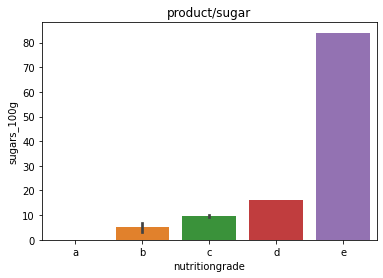

In [39]:
sns.barplot(x='nutritiongrade', y='sugars_100g', order=['a','b','c','d', 'e'], data= frudrinks).set_title('product/sugar')
plt.savefig("barplot3.png")

## Test de ANOVA (Type 1 & Type 2)

Je fais test de ANOVA

In [40]:
data1=pd.DataFrame(frudrinks, columns = ['main_category', 'countries', 'calcium_100g', 'sugars_100g', 'salt_100g', 'proteins_100g', 'nutritiongrade'])

In [41]:
data1 = data1.rename(columns={'main_category': 'maincategory', 'countries': 'countries', 'calcium_100g': 'calcium', 'salt_100g': 'salt', 'proteins_100g': 'proteins', 'sugars_100g': 'sugars', 'nutritiongrade': 'nutritiongrade'})

ANOVA test facteur 1

In [42]:
model = ols('sugars ~ C(nutritiongrade)', data=data1).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
C(nutritiongrade),5440.442517,3.0,506.097312,1.853521e-09
Residual,28.666121,8.0,NaN,NaN


ANOVA facteur 11

In [43]:
model = ols('sugars~ C(nutritiongrade) + C(countries) + C(nutritiongrade):C(countries)', data=data1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

/Users/sanjibansantra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1750: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/sanjibansantra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1750: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/Users/sanjibansantra/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:1750: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 3
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(nutritiongrade),99.698982,3.0,5.064348,0.087605
C(countries),10010.706161,2.0,762.761535,0.000010
C(nutritiongrade):C(countries),10243.710210,6.0,260.171727,0.000049
Residual,26.248587,4.0,NaN,NaN


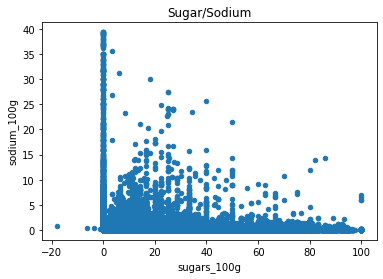

In [44]:
fig = data.plot(kind = 'scatter', x="sugars_100g", y="sodium_100g", title="Sugar/Sodium")
plt.savefig("scatt2.png")

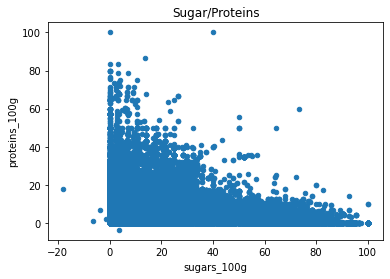

In [45]:
fig = data.plot(kind = 'scatter', x="sugars_100g", y="proteins_100g", title="Sugar/Proteins")
plt.savefig("scatt1.png")

In [46]:
data['product_name'].unique().shape[0]

85889

In [47]:
data_sugar=data[['product_name', 'sugars_100g']][0: 10]
data_sugar = data_sugar.sort_values(['sugars_100g'])

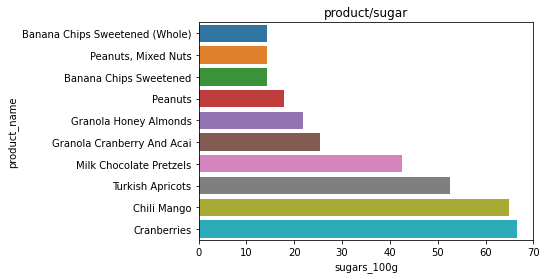

In [48]:
sns.barplot(y='product_name', x='sugars_100g', data= data_sugar).set_title('product/sugar')
plt.savefig("barhor.png")

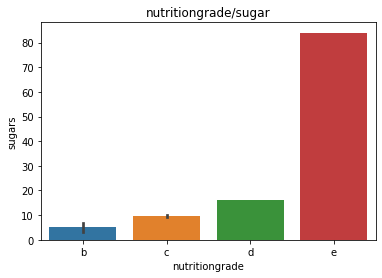

In [49]:
result = data1.groupby(['nutritiongrade'])['sugars'].aggregate(np.median).reset_index().sort_values('sugars')
sns.barplot(x='nutritiongrade', y='sugars', data= data1, order=result['nutritiongrade']).set_title('nutritiongrade/sugar')
plt.savefig("barver.png")

Text(0.5, 1.0, 'nutritiongrade/protein')

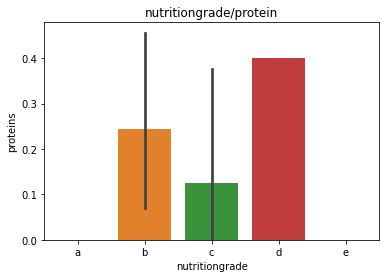

In [50]:
sns.barplot(x='nutritiongrade', y='proteins', data= data1, order=['a', 'b', 'c', 'd','e']).set_title('nutritiongrade/protein')

Text(0.5, 1.0, 'Grouped Boxplot pour nutritiongrade/sugars')

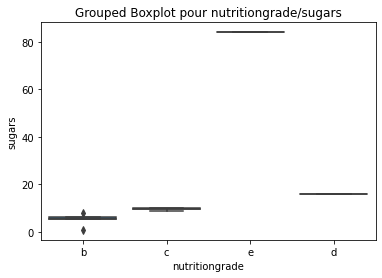

In [51]:
sns.boxplot(x='nutritiongrade', y='sugars', data=data1).set_title('Grouped Boxplot pour nutritiongrade/sugars')

Text(0.5, 1.0, 'Stripplot pour nutriscore/calcium')

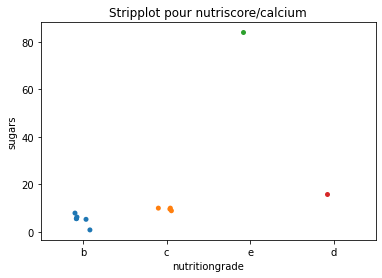

In [52]:
sns.stripplot(x='nutritiongrade', y="sugars", data=data1).set_title('Stripplot pour nutriscore/calcium')

## ACP test & Scree plot

In [53]:
df = data.drop(columns=['product_name', 'countries', 'ingredients_text', 'serving_size', 'additives_n',
                        'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n',
       'additives', 'additives_tags', 'additives_fr', 'nutritiongrade', 'sodium_100g',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr',
       'main_category', 'main_category_fr', 'nutrition-score_100g', 'saturated-fat_100g', 'trans-fat_100g', 'vitamin-c_100g', 'calcium_100g', 'iron_100g', 'vitamin-a_100g', 'cholesterol_100g'])

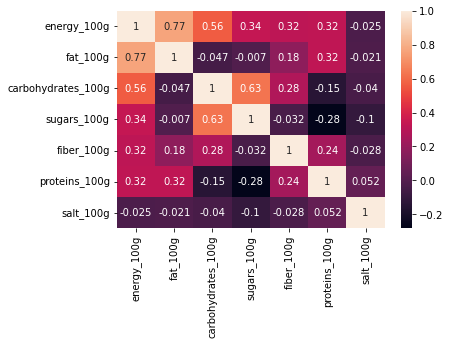

In [54]:
sns.heatmap(df.corr(), annot = True);

In [55]:
df = df.drop(columns=['carbohydrates_100g', 'proteins_100g'])
df = df.fillna(0)
df.columns

Index(['energy_100g', 'fat_100g', 'sugars_100g', 'fiber_100g', 'salt_100g'], dtype='object')

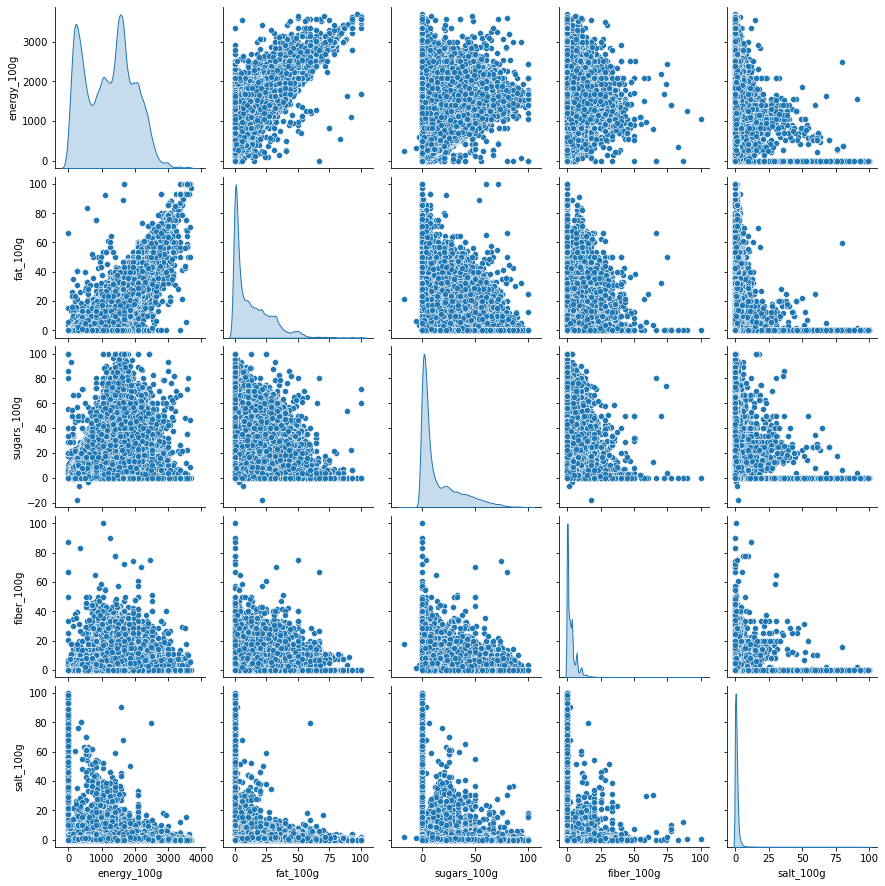

In [56]:
sns.pairplot(df, diag_kind='kde');

In [57]:
scaler=StandardScaler()
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data

array([[ 1.39670877,  1.00481479, -0.06250364,  0.17440373, -0.35572175],
       [ 0.98589068,  0.29794156,  0.12000208,  0.98072657, -0.18000401],
       [ 0.82673269, -0.16076703,  0.50801846,  0.61212185, -0.28543466],
       ...,
       [ 0.24043271, -0.2393085 ,  0.76925215,  1.25718012, -0.09214515],
       [ 0.35469999, -0.88084052, -0.67290095,  0.42781948, -0.3472873 ],
       [-1.65449971, -0.88084052, -0.79303777, -0.6549569 , -0.35572175]])

In [58]:
scaled_data.shape

(122554, 5)

### Visualisation in two dimension

In [59]:
pca=PCA(n_components=2)

In [60]:
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[ 1.62808449,  0.05980405],
       [ 1.21652598,  0.14234116],
       [ 0.80381893, -0.4051202 ],
       ...,
       [ 0.6183145 , -0.28426629],
       [-0.28471447,  0.23182843],
       [-2.03805768,  0.04446057]])

In [61]:
pDf = pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2'])

In [62]:
finalDf = pd.concat([pDf, data[['nutritiongrade']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,nutritiongrade
0,1.628084,0.059804,NaN
1,1.216526,0.142341,d
2,0.803819,-0.405120,b
3,2.593702,0.583374,NaN
4,0.673905,-1.790246,NaN


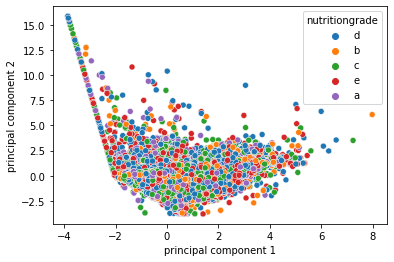

In [63]:
sns.scatterplot(x='principal component 1', y='principal component 2', hue='nutritiongrade', data=finalDf)
plt.savefig("acp.png")

In [64]:
num_components = 5
# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(scaled_data)
nwD=pca.transform(scaled_data)
pcs = pca.components_ 
pca.explained_variance_ratio_.cumsum()

array([0.3913704 , 0.61368658, 0.80559159, 0.97211169, 1.        ])

In [65]:
def display_scree_plot(pca):
    '''Display a scree plot for the pca'''
    
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("Number of principal components")
    plt.ylabel("Percentage explained variance")
    plt.title("Scree plot")
    plt.show(block=False)

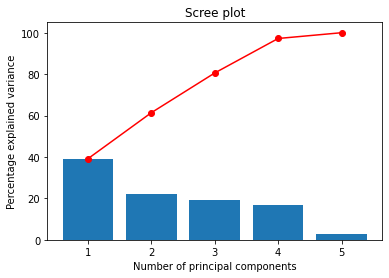

In [66]:
display_scree_plot(pca)

## Cercle des corrélations

In [67]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    """Display correlation circles, one for each factorial plane"""

    # For each factorial plane
    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            # Initialise the matplotlib figure
            fig, ax = plt.subplots(figsize=(10,10))

            # Determine the limits of the chart
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # Add arrows
            # If there are more than 30 arrows, we do not display the triangle at the end
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="green")
                # (see the doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # Display variable names
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # Display circle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # Define the limits of the chart
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # Display grid lines
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # Label the axes, with the percentage of variance explained
            plt.xlabel('PC{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('PC{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))
            nr=d1+1
            plt.title("Correlation Circle (PC{} and PC{})".format(d1+1, d2+1))
            plt.show(block=False)
            d = {'values': pca.components_[d1], 'factors': labels}
            df1= pd.DataFrame(d)
            df1.set_index('factors')
            df2=df1.sort_values(by='values', ascending=False)
            df3=df1.sort_values(by='values', ascending=True)
            print("Principal Component" + str(nr)+ " Presenting Values")
            print(df2.head(3))
            print(df3.head(3))
            
            nr=d2+1
            
            d = {'values': pca.components_[d2], 'factors': labels}
            df1= pd.DataFrame(d)
            df1.set_index('factors')
            df2=df1.sort_values(by='values', ascending=False)
            df3=df1.sort_values(by='values', ascending=True)
            print("Principal Component" + str(nr)+ " Presenting Values")
            print(df2.head(3))
            print(df3.head(3))

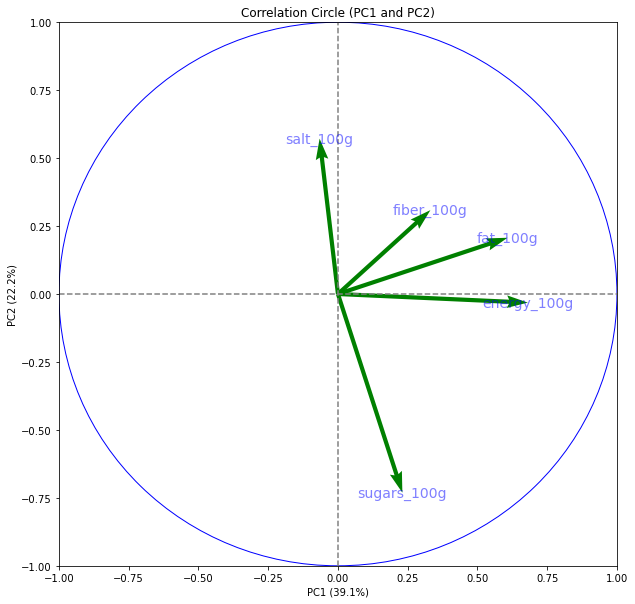

Principal Component1 Presenting Values
   values      factors
0  0.6806  energy_100g
1  0.6078     fat_100g
3  0.3313   fiber_100g
   values      factors
4 -0.0658    salt_100g
2  0.2309  sugars_100g
3  0.3313   fiber_100g
Principal Component2 Presenting Values
   values     factors
4  0.5716   salt_100g
3  0.3085  fiber_100g
1  0.2069    fat_100g
   values      factors
2 -0.7309  sugars_100g
0 -0.0317  energy_100g
1  0.2069     fat_100g


In [68]:
pca.components_=np.around(pca.components_, decimals=4)
pcs = pca.components_ 
m_1 = display_circles(pcs, num_components, pca, [(0,1)], labels = np.array(df.columns),)

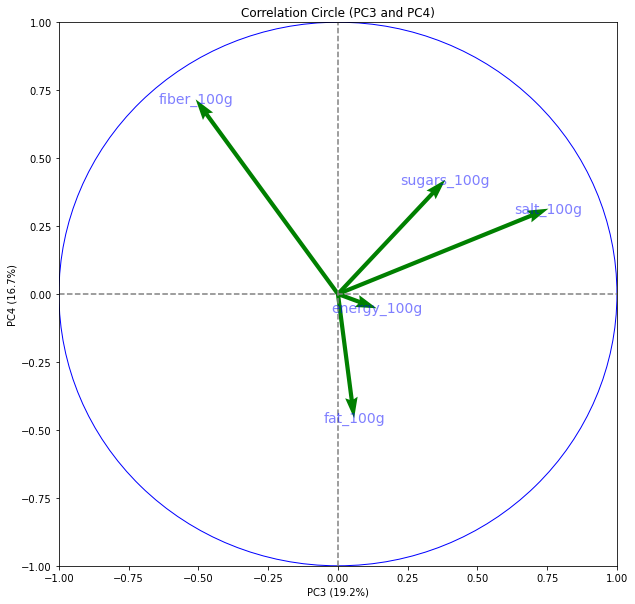

Principal Component3 Presenting Values
   values      factors
4  0.7544    salt_100g
2  0.3851  sugars_100g
0  0.1388  energy_100g
   values      factors
3 -0.5099   fiber_100g
1  0.0579     fat_100g
0  0.1388  energy_100g
Principal Component4 Presenting Values
   values      factors
3  0.7161   fiber_100g
2  0.4206  sugars_100g
4  0.3140    salt_100g
   values      factors
1 -0.4571     fat_100g
0 -0.0526  energy_100g
4  0.3140    salt_100g


In [69]:
m_2 = display_circles(pcs, num_components, pca, [(2,3)], labels = np.array(df.columns),)